# Lead Scoring Case Study

## Problem statement

This case study aims to build a model wherein we can assign lead scores to the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.

## Importing the libraries.

In [880]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [882]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [885]:
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [887]:
leads_df.iloc[:,:11].head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead


In [889]:
leads_df.iloc[:,11:21].head()

,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper
0,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No
1,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No
2,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No
3,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No
4,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No


In [891]:
leads_df.iloc[:,21:].head()

,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [893]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [895]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [897]:
leads_df.shape

(9240, 37)

## Data cleanup

In [900]:
leads_df['Lead Number'].nunique()

9240

In [902]:
leads_df.drop('Prospect ID', axis=1, inplace=True)

In [904]:
leads_df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [906]:
#Dropping columns with more than 40% null values
for col in leads_df.columns:
    if leads_df[col].isnull().sum() > df.shape[0]*0.4:
        leads_df.drop(col, axis=1, inplace=True)

In [908]:
missing_percentage = (leads_df.isnull().sum() / len(df)) * 100
missing_percentage

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

Columns 'Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity' have very minimal rows with missing values.  These can be removed as they won't impact the model.

In [911]:
# Drop rows where specific columns ('col1' or 'col2') have null values
leads_df = leads_df.dropna(subset=['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'])

In [913]:
# Check for 'Select' value in all columns
(leads_df.isna() | (leads_df == 'Select')).sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2296
Specialization                                   3282
How did you hear about X Education               7086
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

The 'Select' values are as good as null values.  We can drop the columns with more than 40% missing values.

In [916]:
# Dropping columns with more than 40% 'Select' values
select_percentage = (leads_df.isna() | (leads_df == 'Select')).mean()
leads_df = leads_df.loc[:, select_percentage <= 0.4]

In [918]:
# Replace 'Select' with 'Unknown' in these columns
leads_df.loc[:, columns_with_select] = leads_df.loc[:, columns_with_select].replace('Select', 'Unknown')
leads_df.loc[:, columns_with_select] = leads_df.loc[:, columns_with_select].fillna('Unknown')

In [920]:
leads_df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2296
Specialization                                      0
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [922]:
missing = []
for col in leads_df.columns:
    if leads_df[col].isnull().mean() * 100 > 1:
        missing.append(col)
missing

['Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags']

In [924]:
for col in missing:
    leads_df[col] = leads_df[col].fillna('Unknown')

In [926]:
leads_df.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

## Data Preparation

### Handling Outliers 

In [930]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 non-n

In [932]:
leads_df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

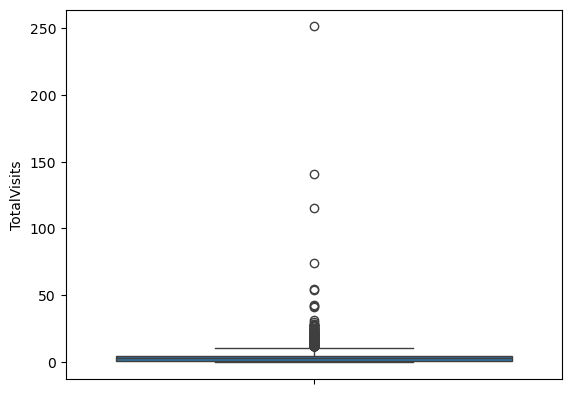

In [934]:
#plot the boxplot of balance variable after scaling in 8:2.
# plt.figure(figsize=[8,2])
sns.boxplot(leads_df['TotalVisits'])
plt.show()

In [936]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
leads_df['TotalVisits'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     3.0
0.70     4.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

In [938]:
leads_df.shape

(9074, 29)

In [940]:
leads_df[leads_df['TotalVisits'] <= 17]['TotalVisits'].describe()

count    8991.000000
mean        3.217106
std         2.989530
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [942]:
# Drop the outlier values
leads_df.drop(leads_df[leads_df['TotalVisits'] > 17].index, inplace=True)
leads_df['TotalVisits'].describe()

count    8991.000000
mean        3.217106
std         2.989530
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

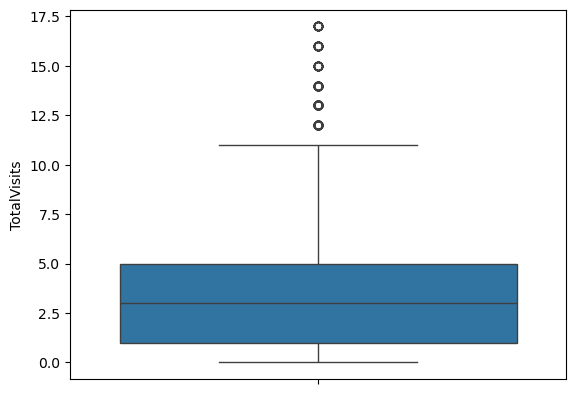

In [944]:
sns.boxplot(leads_df['TotalVisits'])
plt.show()

In [946]:
leads_df['Total Time Spent on Website'].describe()

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
25%         9.000000
50%       245.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

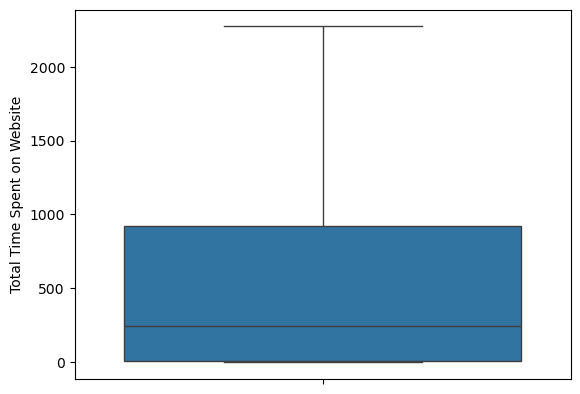

In [948]:
sns.boxplot(leads_df['Total Time Spent on Website'])
plt.show()

In [950]:
leads_df['Page Views Per Visit'].describe()

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

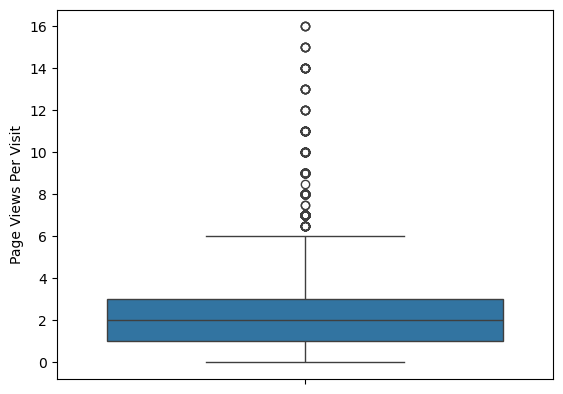

In [952]:
sns.boxplot(leads_df['Page Views Per Visit'])
plt.show()

#### Converting some binary variables (Yes/No) to 0/1

In [955]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

In [957]:
leads_df.iloc[:,:11].head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unknown
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India


In [959]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    8991 non-null   int64  
 1   Lead Origin                                    8991 non-null   object 
 2   Lead Source                                    8991 non-null   object 
 3   Do Not Email                                   8991 non-null   int64  
 4   Do Not Call                                    8991 non-null   int64  
 5   Converted                                      8991 non-null   int64  
 6   TotalVisits                                    8991 non-null   float64
 7   Total Time Spent on Website                    8991 non-null   int64  
 8   Page Views Per Visit                           8991 non-null   float64
 9   Last Activity                                  8991 non-n

#### Handle outliers in categorical variables

Here we are grouping the categories that are less frequent.  This helps in reducing the number of dummy variables and there by simplifying the model.

In [963]:
# List categorical columns
categorical_columns = leads_df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'Last Notable Activity']

In [965]:
# Group categories with less than 5% occurences as "Other".

for col in categorical_columns:
    category_counts = leads_df[col].value_counts()
    threshold = 0.05 * len(leads_df)
    rare_categories = category_counts[category_counts < threshold].index
    leads_df[col] = leads_df[col].replace(rare_categories, 'Other')

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [968]:
# Map a prefix for each categorical column for adding in the dummy variable names
categorical_prefix_map = {
    'Lead Origin': 'LeadOrigin',
    'Lead Source': 'LeadSource',
    'Last Activity': 'LastActivity',
    'Country': 'Country',
    'Specialization': 'Specialization',
    'What is your current occupation': 'CurrentOccupation',
    'What matters most to you in choosing a course': 'CourseGoal',
    'Tags': 'Tags',
    'City': 'City',
    'Last Notable Activity': 'LastNotableActivity'
}

In [970]:
# Create dummy variables for the categorical columns, drop 'Other' category for each, and drop the duplicate column
for col in categorical_prefix_map.keys():
    # Creating dummy variables for the variable 'MultipleLines'
    prefix = categorical_prefix_map[col]
    d1 = pd.get_dummies(leads_df[col], dtype=int, prefix=prefix)
    # Dropping MultipleLines_No phone service column
    d2 = d1.drop([prefix + '_Other'], axis=1)
    #Adding the results to the master dataframe
    leads_df = pd.concat([leads_df,d2], axis=1)
    leads_df.drop(col, axis=1, inplace=True)

In [972]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9239
Data columns (total 54 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               8991 non-null   int64  
 1   Do Not Email                              8991 non-null   int64  
 2   Do Not Call                               8991 non-null   int64  
 3   Converted                                 8991 non-null   int64  
 4   TotalVisits                               8991 non-null   float64
 5   Total Time Spent on Website               8991 non-null   int64  
 6   Page Views Per Visit                      8991 non-null   float64
 7   Search                                    8991 non-null   int64  
 8   Magazine                                  8991 non-null   int64  
 9   Newspaper Article                         8991 non-null   int64  
 10  X Education Forums                       

### Test-Train Split

In [978]:
from sklearn.model_selection import train_test_split

In [980]:
# Putting feature variable to X
X = leads_df.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Thane & Outskirts,City_Unknown,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [984]:
# Putting response variable to y
y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [986]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [1014]:
X_train.iloc[:,51:61].head()

,LastNotableActivity_SMS Sent
1467,1
108,0
7858,1
5220,1
3871,0


In [989]:
from sklearn.preprocessing import StandardScaler

In [1016]:
scaler = StandardScaler()

columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[columns] = scaler.fit_transform(X_train[columns])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Thane & Outskirts,City_Unknown,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_SMS Sent
1467,0,0,0.246579,0.764873,0.777363,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
108,0,0,0.908719,-0.148599,0.298183,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7858,0,0,2.564067,-0.649536,-0.554758,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5220,0,0,-1.077699,-0.881587,-1.139357,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3871,0,0,-1.077699,-0.881587,-1.139357,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [1018]:
### Checking the Conversion Rate
conversion_rate = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
conversion_rate

37.80447113780447

We have almost 38% leads conversion rate

### Feature Selection Using RFE

In [1028]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1030]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [1032]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True, False])

In [1034]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 16),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Search', False, 4),
 ('Magazine', False, 37),
 ('Newspaper Article', False, 29),
 ('X Education Forums', False, 36),
 ('Newspaper', False, 19),
 ('Digital Advertisement', False, 32),
 ('Through Recommendations', False, 31),
 ('Receive More Updates About Our Courses', False, 33),
 ('Update me on Supply Chain Content', False, 34),
 ('Get updates on DM Content', False, 35),
 ('I agree to pay the amount through cheque', False, 38),
 ('A free copy of Mastering The Interview', False, 24),
 ('LeadOrigin_API', False, 22),
 ('LeadOrigin_Landing Page Submission', False, 6),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadSource_Direct Traffic', False, 11),
 ('LeadSource_Google', False, 12),
 ('LeadSource_Olark Chat', False, 30),
 ('LeadSource_Organic Search', False, 10),
 ('LastActivity_Email Opened', True, 1),
 ('LastActivity_Olar

In [1042]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LastActivity_Email Opened',
       'LastActivity_SMS Sent', 'Country_Unknown',
       'CurrentOccupation_Working Professional', 'CourseGoal_Unknown',
       'Tags_Already a student', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email',
       'LastNotableActivity_Email Opened', 'LastNotableActivity_Modified'],
      dtype='object')

##### Assessing the model with StatsModels

In [1047]:
import statsmodels.api as sm

In [1049]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1508.9
Date:                Sun, 15 Dec 2024   Deviance:                       3017.8
Time:                        23:33:58   Pearson chi2:                 9.34e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5703
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1478      0.147     -7.832      0.000      -1.435      -0.861
Do Not Email                                -1.5355      0.228     -6.734      0.000      -1.982      -1.089
Total Time Spent on Website                  1.1576      0.056     20.751      0.000       1.048       1.267
LeadOrigin_Lead Add Form                     3.0629      0.307      9.971      0.000       2.461       3.665
LastActivity_Email Opened                    1.3605      0.193      7.058      0.000       0.983       1.738
LastActivity_SMS Sent                        1.5256      0.136     11.257      0.000       1.260       1.791
Country_Unknown                              1.1664      0.140      8.351      0.000       0.893       1.440
CurrentOccupation_Working Professional       1.4506      0.291      4.976      0.000       0.879       2.022
CourseGoal_Unknown                          -1.9612      0.141    -13.924      0.000      -2.237      -1.685
Tags_Already a student                      -4.8548      1.014     -4.785      0.000      -6.843      -2.866
Tags_Interested in other courses            -2.7870      0.354     -7.880      0.000      -3.480      -2.094
Tags_Ringing                                -3.7378      0.246    -15.200      0.000      -4.220      -3.256
Tags_Unknown                                 0.9149      0.146      6.248      0.000       0.628       1.202
Tags_Will revert after reading the email     3.6329      0.188     19.333      0.000       3.265       4.001
LastNotableActivity_Email Opened            -1.4378      0.223     -6.441      0.000      -1.875      -1.000
LastNotableActivity_Modified                -1.0963      0.135     -8.129      0.000      -1.361      -0.832
============================================================================================================
"""

In [1051]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1467    0.998251
108     0.085792
7858    0.962991
5220    0.372243
3871    0.106651
686     0.969892
1694    0.165358
2180    0.083377
6845    0.106651
191     0.015278
dtype: float64

In [1053]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99825058, 0.08579212, 0.96299101, 0.37224326, 0.10665069,
       0.96989242, 0.16535835, 0.08337703, 0.10665069, 0.01527831])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [1056]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead Number
0,1,0.998251,1467
1,0,0.085792,108
2,1,0.962991,7858
3,1,0.372243,5220
4,0,0.106651,3871
5,1,0.969892,686
6,0,0.165358,1694
7,0,0.083377,2180
8,0,0.106651,6845
9,0,0.015278,191


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [1061]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.998251,1467,1
1,0,0.085792,108,0
2,1,0.962991,7858,1
3,1,0.372243,5220,0
4,0,0.106651,3871,0
5,1,0.969892,686,1
6,0,0.165358,1694,0
7,0,0.083377,2180,0
8,0,0.106651,6845,0
9,0,0.015278,191,0


In [1063]:
from sklearn import metrics

In [1067]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3720  206]
 [ 401 1966]]


In [1069]:
# Predicted     not_converted  converted
# Actual
# not_converted      3720         206
# converted          401          1966  

In [1071]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9035436198951216


#### Checking VIFs

In [1074]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1076]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,LastNotableActivity_Email Opened,8.08
3,LastActivity_Email Opened,7.49
11,Tags_Unknown,5.67
7,CourseGoal_Unknown,4.54
12,Tags_Will revert after reading the email,2.15
14,LastNotableActivity_Modified,2.14
5,Country_Unknown,2.07
4,LastActivity_SMS Sent,1.96
10,Tags_Ringing,1.49
2,LeadOrigin_Lead Add Form,1.45


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [1079]:
col = col.drop('LastNotableActivity_Email Opened', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LastActivity_Email Opened',
       'LastActivity_SMS Sent', 'Country_Unknown',
       'CurrentOccupation_Working Professional', 'CourseGoal_Unknown',
       'Tags_Already a student', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email',
       'LastNotableActivity_Modified'],
      dtype='object')

In [1081]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1529.2
Date:                Sun, 15 Dec 2024   Deviance:                       3058.5
Time:                        23:45:29   Pearson chi2:                 7.92e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5675
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4201      0.142     -9.995      0.000      -1.699      -1.142
Do Not Email                                -1.4853      0.226     -6.561      0.000      -1.929      -1.042
Total Time Spent on Website                  1.1691      0.056     21.057      0.000       1.060       1.278
LeadOrigin_Lead Add Form                     3.1578      0.305     10.346      0.000       2.560       3.756
LastActivity_Email Opened                    0.4146      0.130      3.180      0.001       0.159       0.670
LastActivity_SMS Sent                        1.6956      0.133     12.769      0.000       1.435       1.956
Country_Unknown                              1.2090      0.139      8.719      0.000       0.937       1.481
CurrentOccupation_Working Professional       1.4358      0.290      4.959      0.000       0.868       2.003
CourseGoal_Unknown                          -1.9476      0.140    -13.942      0.000      -2.221      -1.674
Tags_Already a student                      -4.9777      1.016     -4.899      0.000      -6.969      -2.986
Tags_Interested in other courses            -2.7417      0.348     -7.872      0.000      -3.424      -2.059
Tags_Ringing                                -3.7664      0.245    -15.400      0.000      -4.246      -3.287
Tags_Unknown                                 0.8366      0.145      5.779      0.000       0.553       1.120
Tags_Will revert after reading the email     3.5399      0.186     19.005      0.000       3.175       3.905
LastNotableActivity_Modified                -0.6081      0.110     -5.518      0.000      -0.824      -0.392
============================================================================================================
"""

In [1083]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1085]:
y_train_pred[:10]

array([0.99786138, 0.06269085, 0.95504286, 0.34139088, 0.1258508 ,
       0.97364833, 0.22007246, 0.11081946, 0.1258508 , 0.0175759 ])

In [1087]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [1089]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.997861,1467,1
1,0,0.062691,108,0
2,1,0.955043,7858,1
3,1,0.341391,5220,0
4,0,0.125851,3871,0


In [1093]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9051326871126648


The overall accuracy has increased from 90.35% to 90.51%

##### Let's check the VIFs again

In [1097]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Unknown,5.51
7,CourseGoal_Unknown,4.54
5,Country_Unknown,2.07
12,Tags_Will revert after reading the email,2.06
4,LastActivity_SMS Sent,1.92
3,LastActivity_Email Opened,1.90
13,LastNotableActivity_Modified,1.63
2,LeadOrigin_Lead Add Form,1.45
1,Total Time Spent on Website,1.42
10,Tags_Ringing,1.42


In [1099]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Tags_Unknown')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LastActivity_Email Opened',
       'LastActivity_SMS Sent', 'Country_Unknown',
       'CurrentOccupation_Working Professional', 'CourseGoal_Unknown',
       'Tags_Already a student', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'LastNotableActivity_Modified'],
      dtype='object')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

In [1103]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1105]:
y_train_pred[:10]

array([0.99775833, 0.05915615, 0.95669959, 0.37586237, 0.13905784,
       0.97429233, 0.22954388, 0.09914754, 0.13905784, 0.01493427])

In [1107]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [1109]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.997758,1467,1
1,0,0.059156,108,0
2,1,0.956700,7858,1
3,1,0.375862,5220,0
4,0,0.139058,3871,0


In [1113]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8959160972509137


The overall accuracy is almost the same.

##### Let's now check the VIFs again

In [1117]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Country_Unknown,1.96
11,Tags_Will revert after reading the email,1.89
7,CourseGoal_Unknown,1.83
4,LastActivity_SMS Sent,1.72
3,LastActivity_Email Opened,1.71
12,LastNotableActivity_Modified,1.62
2,LeadOrigin_Lead Add Form,1.45
1,Total Time Spent on Website,1.42
10,Tags_Ringing,1.35
6,CurrentOccupation_Working Professional,1.29


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [1120]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3691,  235],
       [ 420, 1947]])

In [1124]:
# Actual/Predicted        not_converted    converted
        # not_converted        3269           366
        # converted            595            692  

In [1128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8959160972509137

### Plotting the ROC Curve

In [1153]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1155]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

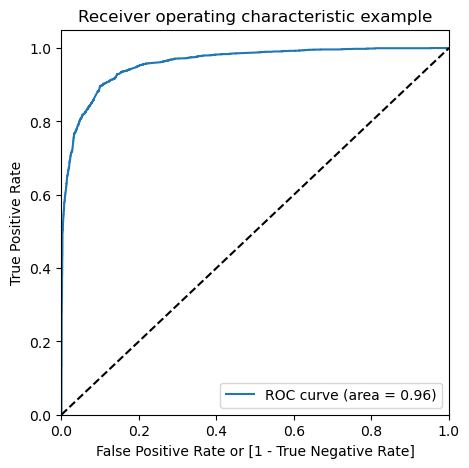

In [1157]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1161]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.997758,1467,1,1,1,1,1,1,1,1,1,1,1
1,0,0.059156,108,0,1,0,0,0,0,0,0,0,0,0
2,1,0.956700,7858,1,1,1,1,1,1,1,1,1,1,1
3,1,0.375862,5220,0,1,1,1,1,0,0,0,0,0,0
4,0,0.139058,3871,0,1,1,0,0,0,0,0,0,0,0


In [1163]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376132  1.000000  0.000000
0.1   0.1  0.803115  0.971272  0.701732
0.2   0.2  0.873034  0.937896  0.833928
0.3   0.3  0.889083  0.909168  0.876974
0.4   0.4  0.896711  0.879594  0.907030
0.5   0.5  0.895916  0.822560  0.940143
0.6   0.6  0.893691  0.786227  0.958482
0.7   0.7  0.885905  0.747782  0.969180
0.8   0.8  0.870491  0.690748  0.978859
0.9   0.9  0.847767  0.614280  0.988538


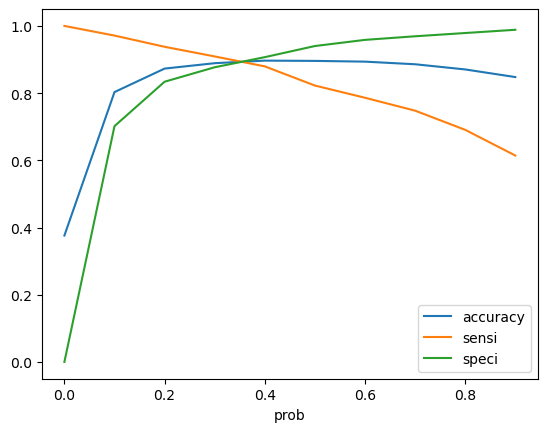

In [1173]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [1176]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.997758,1467,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.059156,108,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.956700,7858,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.375862,5220,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.139058,3871,0,1,1,0,0,0,0,0,0,0,0,0


In [1178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8962339106944224

In [1180]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3515,  411],
       [ 242, 2125]])

In [1182]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1184]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8977608787494719

In [1186]:
# Let us calculate specificity
TN / float(TN+FP)

0.8953132959755477

In [1188]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10468670402445236


In [1190]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8379337539432177


In [1192]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9355869044450359


## Precision and Recall

In [1131]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3691,  235],
       [ 420, 1947]])

In [1142]:
from sklearn.metrics import precision_score, recall_score

In [1146]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8923006416131989

In [1150]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8225602027883396

### Step 11: Making predictions on the test set

In [1195]:
columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_test[columns] = scaler.transform(X_test[columns])

In [1197]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,LeadOrigin_Lead Add Form,LastActivity_Email Opened,LastActivity_SMS Sent,Country_Unknown,CurrentOccupation_Working Professional,CourseGoal_Unknown,Tags_Already a student,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,LastNotableActivity_Modified
8692,0,-0.321717,0,0,1,0,0,0,0,0,0,0,0
6126,0,-0.881587,1,0,1,1,0,0,0,0,0,1,0
5198,0,-0.098874,0,1,0,0,0,1,0,0,0,0,0
4979,0,0.704098,0,0,1,0,0,0,0,0,0,0,0
9225,1,-0.745303,0,0,0,0,0,0,0,0,0,0,1


In [1199]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [1202]:
y_test_pred = res.predict(X_test_sm)

In [1204]:
y_test_pred[:10]

8692    0.545563
6126    0.999283
5198    0.091976
4979    0.801526
9225    0.014434
3533    0.031201
2726    0.952107
3450    0.004841
7683    0.998508
6286    0.021079
dtype: float64

In [1206]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1208]:
# Let's see the head
y_pred_1.head()

,0
8692,0.545563
6126,0.999283
5198,0.091976
4979,0.801526
9225,0.014434


In [1210]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1212]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [1214]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1216]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1218]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,8692,0.545563
1,1,6126,0.999283
2,1,5198,0.091976
3,1,4979,0.801526
4,0,9225,0.014434


In [1220]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1222]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Lead Number','Converted','Converted_Prob'])

In [1224]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,8692,0,0.545563
1,6126,1,0.999283
2,5198,1,0.091976
3,4979,1,0.801526
4,9225,0,0.014434


In [1226]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [1228]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,8692,0,0.545563,1
1,6126,1,0.999283,1
2,5198,1,0.091976,0
3,4979,1,0.801526,1
4,9225,0,0.014434,0


In [1230]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8888065233506302

In [1240]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1524,  142],
       [ 158,  874]])

In [1242]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1244]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8468992248062015

In [1263]:
# Let us calculate specificity
TN / float(TN+FP)

0.9147659063625451

In [1265]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08523409363745499


In [1267]:
# Positive predictive value 
print (TP / float(TP+FP))

0.860236220472441


In [1269]:
# Negative predictive value
print (TN / float(TN+ FN))

0.906064209274673


#### Assign lead score to the final test data set

In [1253]:
y_pred_final['lead_score'] = y_pred_final['Converted_Prob'].map(lambda x: round(x * 100))
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,lead_score
0,8692,0,0.545563,1,55
1,6126,1,0.999283,1,100
2,5198,1,0.091976,0,9
3,4979,1,0.801526,1,80
4,9225,0,0.014434,0,1


### Observations:

#### Train data metrics

- Accuracy: 89.63%
- Sensitivity: 89.78%
- Specificity: 89.53%
- False positive rate: 10.47%
- Positive predictive value: 83.79%
- Negative predictive value: 93.56%

#### Test data metrics

- Accuracy: 88.88%
- Sensitivity: 84.69%
- Specificity: 91.48%
- False positive rate: 8.52%
- Positive predictive value: 86.02%
- Negative predictive value: 90.61%

We are getting a sensitivity of 85.69%.  Meaning the percentage of actual conversions correctly predicted out of the total actual conversions is 85.69%.  This is well above the ballpark lead conversion rate of 80% targeted by the company.